Epoch 1/1000


c:\Users\vikas\.conda\envs\mll\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5022.3901 - mae: 70.6917 - val_loss: 5195.4409 - val_mae: 71.9196
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4869.1934 - mae: 69.5962 - val_loss: 5140.6104 - val_mae: 71.5488
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4858.5234 - mae: 69.5287 - val_loss: 5077.6611 - val_mae: 71.1208
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4783.7549 - mae: 69.0092 - val_loss: 5003.9019 - val_mae: 70.6131
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4677.2437 - mae: 68.2467 - val_loss: 4919.7085 - val_mae: 70.0238
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4658.3579 - mae: 68.0979 - val_loss: 4815.5347 - val_mae: 69.2843
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4680.3193 - mae: 68.2891 - val_loss: 4695.2969 - val_mae: 68.4135
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4458.9795 - mae: 66.6422 - val_loss: 4556.0562 - val_mae: 67.3781
Epoch 9/1000
7/7 ━━

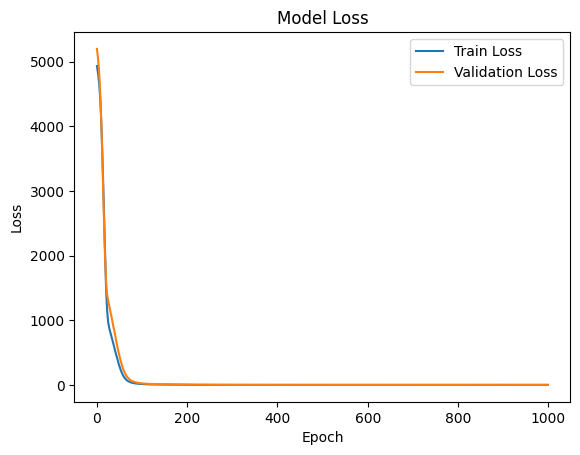

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('main.csv')

# Preprocessing: Select features and target
features = data[['GDP_growth', 'R&D_expenditure', 'patent_activity', 'employment_trends']]
target = data['productivity_index']  # Example target variable

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Building the DNN model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(features_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with 1000 epochs
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Making predictions
predictions = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared (similar to accuracy): {r2 * 100:.2f}%')

# Plotting the training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
